In [ ]:
abtract: từ 2 model đã trên bây giờ ta xem features nào không quan trọng sẽ bỏ đi.
CholCheck,AnyHealthcare,HvyAlcoholConsump,Stroke,NoDocbcCost,HeartDiseaseorAttack,DiffWalk

In [1]:
#load model RF
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import load
modelRF = load('../../results/output_files/RFmodel_db01.pkl')

In [2]:
#xem feature nào quan trọng sử dụng importances từ RandomForest
features_importances=modelRF.feature_importances_

features_importances

array([0.07376209, 0.04090514, 0.00624702, 0.17054923, 0.02926069,
       0.01020708, 0.01854907, 0.02364567, 0.02951073, 0.02219728,
       0.00955646, 0.00789217, 0.01235583, 0.09836966, 0.05316215,
       0.07036641, 0.02443207, 0.0271447 , 0.12712877, 0.05824203,
       0.08651576])

In [3]:
#load data 01
db=pd.read_csv("../../data/processed/database01_drop_duplicates.csv")

In [4]:
#lấy tên các cột
features_name=db.drop('Diabetes',axis=1).columns
features_name

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
#ghép tên cột và features_importances

features_importance_df=pd.DataFrame({
    'Feature': features_name,
    'Importance': features_importances
}).sort_values(by="Importance",ascending=False)

features_importance_df

,Feature,Importance
3,BMI,0.170549
18,Age,0.127129
13,GenHlth,0.098370
20,Income,0.086516
0,HighBP,0.073762
15,PhysHlth,0.070366
19,Education,0.058242
14,MentHlth,0.053162
1,HighChol,0.040905
8,Fruits,0.029511


Với kết quả trên ta thấy có một số feature ít quan trọng là:
CholCheck,AnyHealthcare,HvyAlcoholConsump,Stroke,NoDocbcCost,HeartDiseaseorAttack,DiffWalk
Không bỏ PhysActivity , HighChol,Smoker vì các feature có liên quan đến bệnh tiểu đường.

In [6]:
#loại bỏ feature
features_to_remove=[
    'CholCheck', 'AnyHealthcare', 'HvyAlcoholConsump', 
    'Stroke', 'NoDocbcCost', 'HeartDiseaseorAttack', 'DiffWalk'
]
db_afterRemove=db.drop(features_to_remove,axis=1)

In [7]:
#save data lại
db_afterRemove.to_csv("../../data/processed/DB02.csv",index=False)

In [9]:
#code để save hình vẽ
from pathlib import Path
IMAGES_PATH = Path() / "../../data" / "img"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
import matplotlib.pyplot as plt
def save_fig(fig_id,tight_layout=True,fig_extension="png",resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi=resolution)

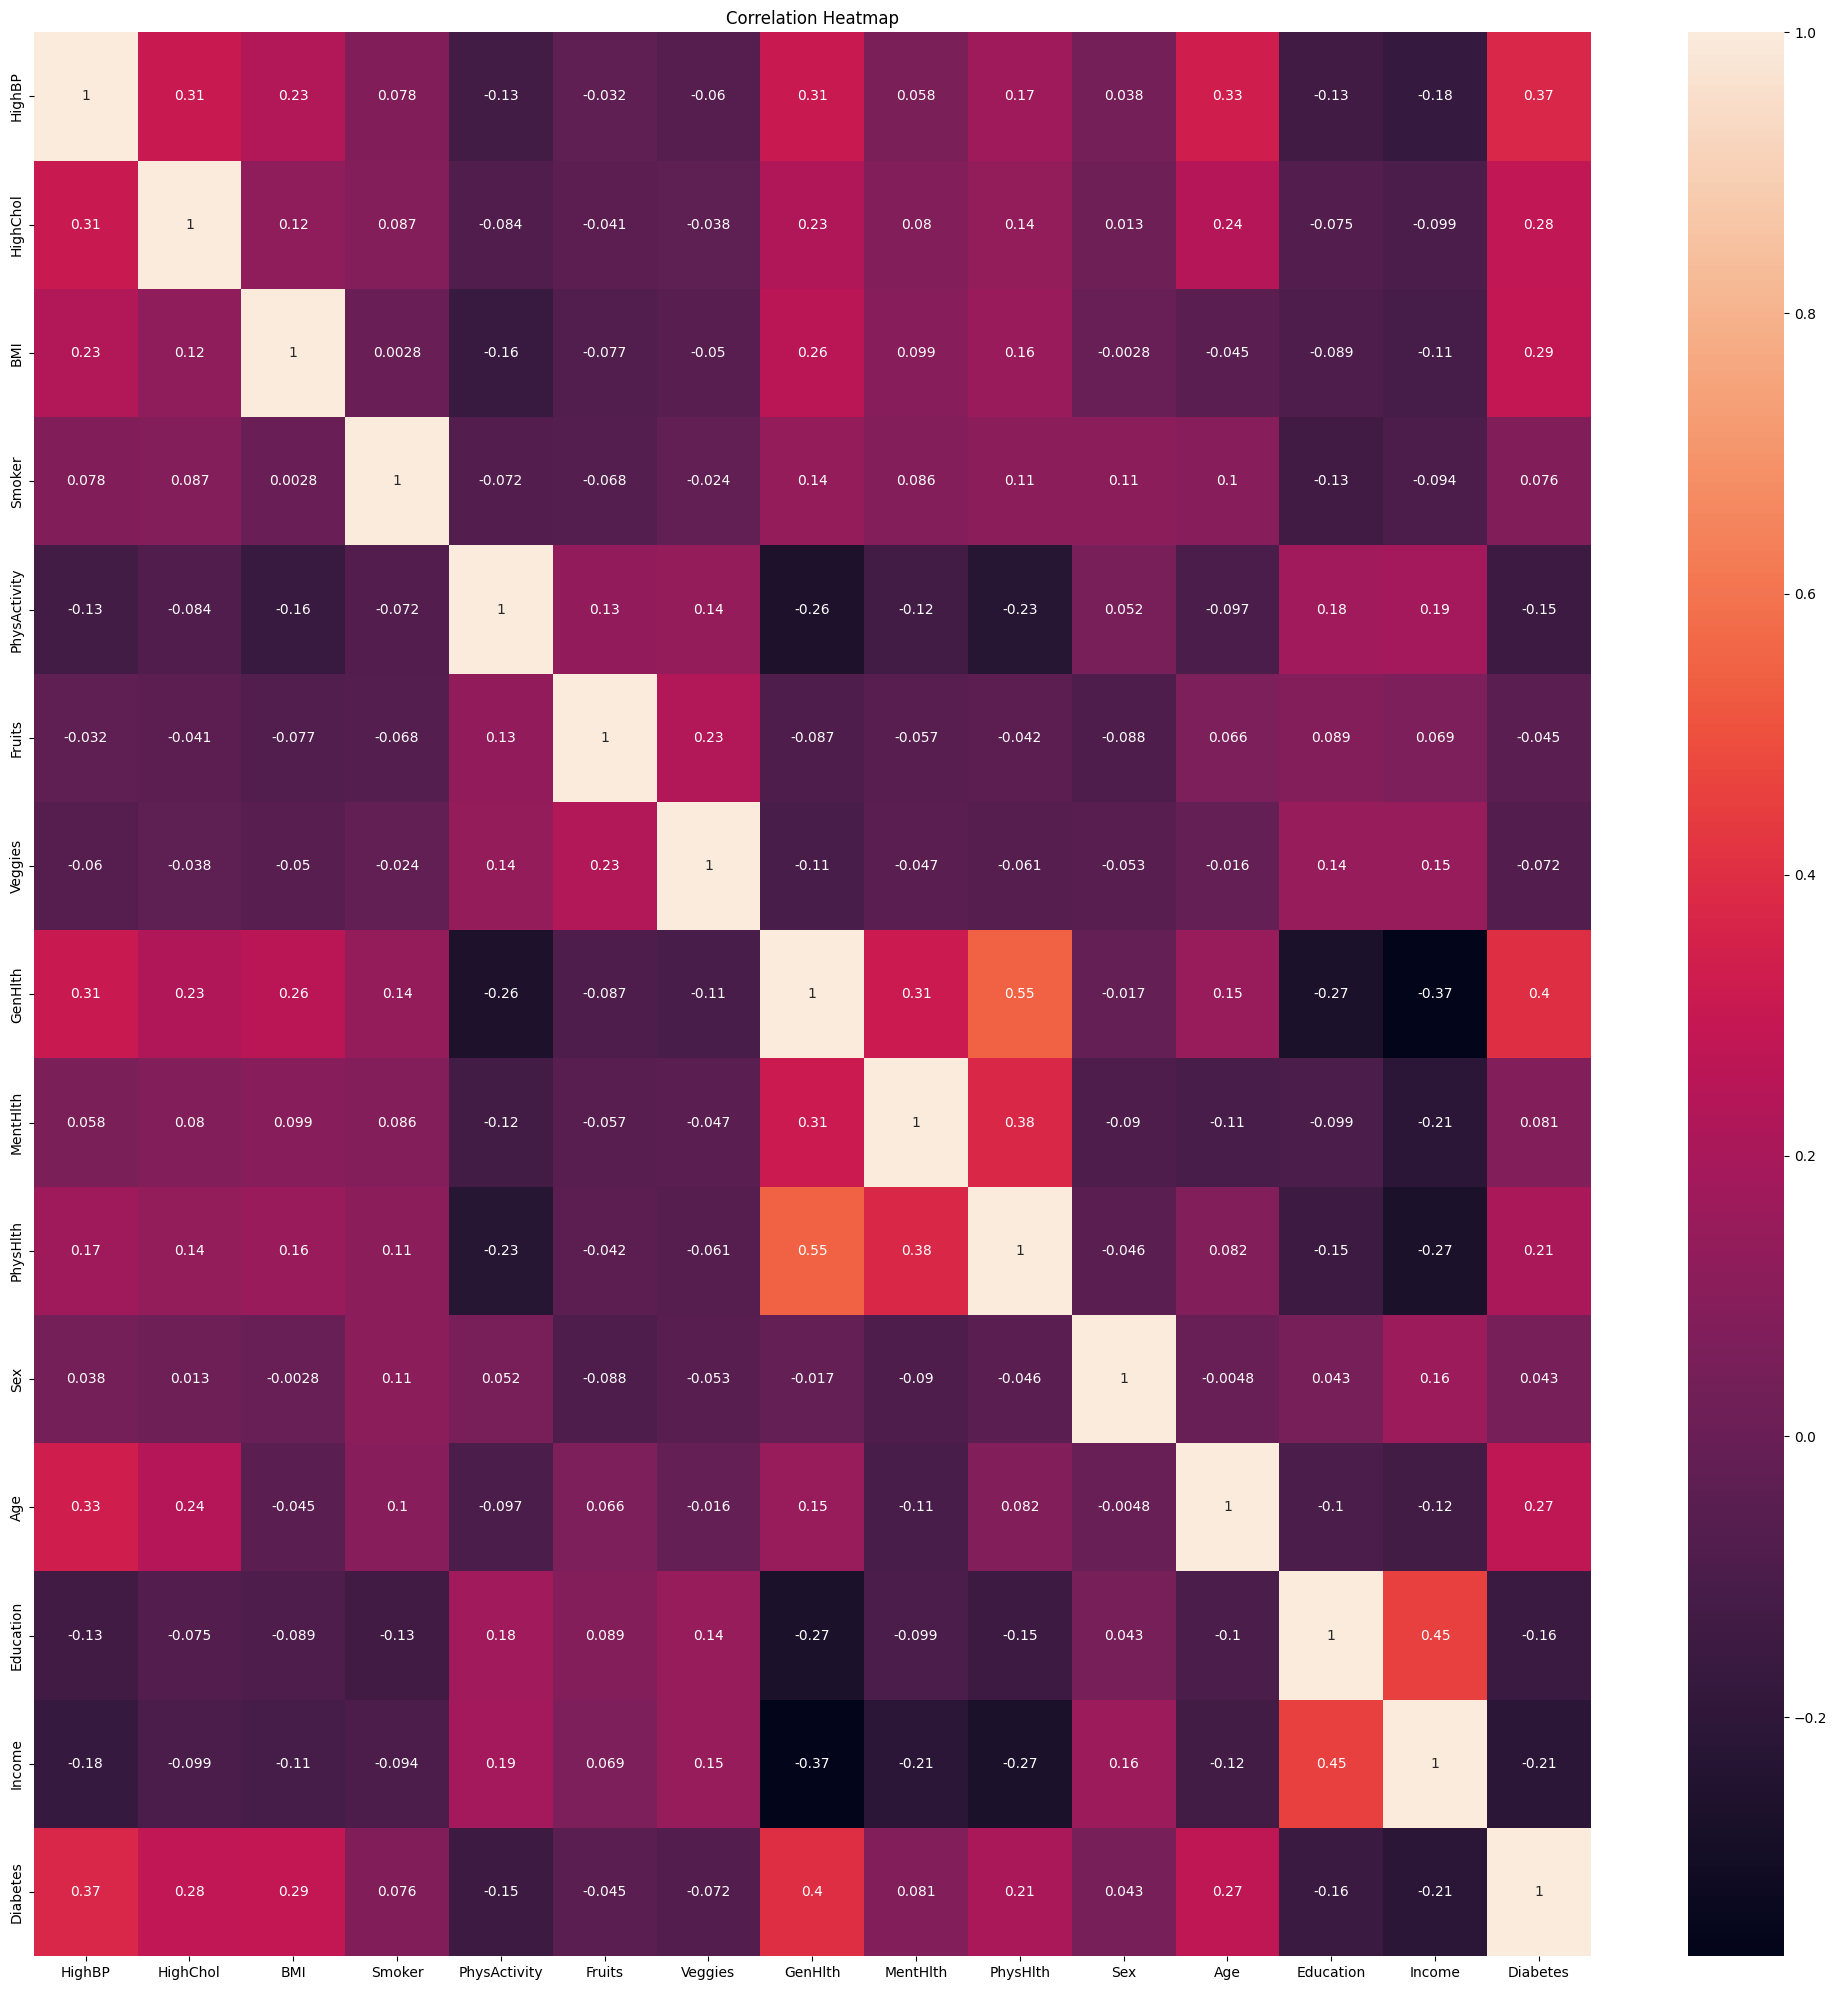

In [14]:
#plot corr mức độ tương tác lẫn nhau
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(db_afterRemove.corr(),annot=True).set_title('Correlation Heatmap')
save_fig("Correlation_Heatmap_DB02")
plt.show()